<a href="https://colab.research.google.com/github/patlollalak/Laxma_projects/blob/master/decisionTree_fast_car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')


# Handle table-like data and matrices :
import numpy as np
import pandas as pd
import math 



# Modelling Algorithms :

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor




# Modelling Helpers :
#from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score
import statsmodels.api as sm

#preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder



#evaluation metrics :

# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score ,classification_report ,confusion_matrix



# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import missingno as msno
import os
import io


In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:

df = pd.read_excel(io.BytesIO(uploaded['fast_car.xlsx']),sheet_name='Sheet1') 

In [37]:
df.head()

,Model,Engine,Turbo,Weight,Fuel_Eco,Fast
0,Prius,small,no,average,good,no
1,Civic,small,no,light,average,no
2,WRX STI,small,yes,average,bad,yes
3,M3,medium,no,heavy,bad,yes
4,RS4,large,no,average,bad,yes


In [0]:
df.drop('Model',axis=1,inplace=True)

In [0]:
df1=pd.get_dummies(df.drop('Fast',axis=1))

In [41]:
df1.head()

,Engine_large,Engine_medium,Engine_small,Turbo_no,Turbo_yes,Weight_average,Weight_heavy,Weight_light,Fuel_Eco_average,Fuel_Eco_bad,Fuel_Eco_good
0,0,0,1,1,0,1,0,0,0,0,1
1,0,0,1,1,0,0,0,1,1,0,0
2,0,0,1,0,1,1,0,0,0,1,0
3,0,1,0,1,0,0,1,0,0,1,0
4,1,0,0,1,0,1,0,0,0,1,0


In [0]:
x=df1
y=df.Fast

In [0]:
LE=LabelEncoder()
y=LE.fit_transform(y)

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20)

In [60]:
dt_entropy=DecisionTreeClassifier(criterion='entropy')
dt_entropy.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
y_pred=dt_entropy.predict(x_train)

In [68]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.75      0.86         4

    accuracy                           0.92        12
   macro avg       0.94      0.88      0.90        12
weighted avg       0.93      0.92      0.91        12



In [63]:
confusion_matrix(y_train,y_pred)

array([[8, 0],
       [1, 3]])

In [64]:
dt_gini=DecisionTreeClassifier(criterion='gini')
dt_entropy.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [66]:
dt_gini.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
y_pred=dt_gini.predict(x_train)

In [72]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.75      0.86         4

    accuracy                           0.92        12
   macro avg       0.94      0.88      0.90        12
weighted avg       0.93      0.92      0.91        12



In [0]:
# Visualizing the DTREE by using Entrop Criterion

from IPython.display import Image  
from sklearn import tree
import pydotplus

In [0]:
tree.export_graphviz(dt_entropy,out_file='fast_car.odt',f
                     illed=True,feature_names=x.columns,class_names=['yes','no'])

In [0]:
file=pydotplus.graph_from_dot_file('fast_car.odt')

In [82]:
file.write_jpg('fast_car.jpg')
file.write_pdf('fast_car.pdf')

True

In [83]:
ls

'fast_car (1).xlsx'   fast_car.jpg   fast_car.pdf    sample_data/
'fast_car (2).xlsx'   fast_car.odt   fast_car.xlsx


![img]('fast_car.pdf')

In [90]:
# DTREE visualization using Gini Criterion


tree.export_graphviz(dt_gini,out_file='fast_car1.odt',
                     filled=True,feature_names=x.columns,class_names=['yes','no'])
file=pydotplus.graph_from_dot_file('fast_car1.odt')
file.write_jpg('fast_car1.jpg')
file.write_pdf('fast_car1.pdf')

True

In [0]:
feam=dt_entropy.feature_importances_
feam_im=pd.Series(feam,index=x.columns)

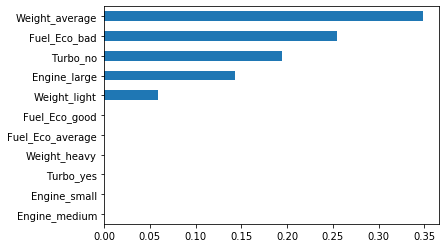

In [98]:
feam_im.sort_values().plot('barh')

In [0]:
feam=dt_gini.feature_importances_
feam_im=pd.Series(feam,index=x.columns)

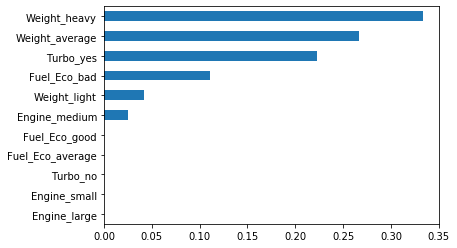

In [100]:
feam_im.sort_values().plot('barh')